In [1]:
import numpy as np
from matplotlib import cycler
import matplotlib.pyplot as plt
from scipy.stats import poisson
import seaborn as sns

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # use this for hi-dpi displays
sns.set_style('whitegrid')  # set the plotting style

# Poisson probability function for discrete events

The Poisson distribution has the following characteristics 
- counts are for rare events
- all events are independent
- the average number of events ($\lambda$) is constant over the period of interest. 

The Poisson probability mass function (PMF) is defined as:

$$f(k;\lambda )= P ( X = k) = {\frac {\lambda ^{k}e^{-\lambda }}{k!}}$$

Where $k$ is the integer number of occurances.

## Poisson statistics

$\lambda$ is a positive, real number and is conveniently equal to the 
mean of the random variable $X$ as well as the variance of $X$:

$$\lambda = \mu = \sigma^2$$

The standard deviation of a Poisson distribution is simply:

$$\sigma = \sqrt{\lambda}$$

The best estimate for the error if an experiment yeilds a mean count of
$\lambda$, is simply $\sqrt{\lambda}$. 
Measurements are therefore reported as having:

$$\lambda \pm \sqrt{\lambda}$$

i.e. two-thirds of the measurements will fall within 
$\lambda \pm \sqrt{\lambda}$.

## Simulate a Poisson discrete random variable

In [3]:
# generate an array of Poisson random variables 
size = 1000
lam = 20

d = np.random.poisson(lam = lam, size = size)
pmf = poisson.pmf(d, lam)

In [4]:
# this is a trick used to sort corresponding elements in `d` and `pmf`
# for plotting using `plt.plot` rather than `plt.scatter`

d_pmf = sorted([list(z) for z in zip(d, pmf)])
d_sorted = [i[0] for i in d_pmf]
pmf_sorted = [i[1] for i in d_pmf]

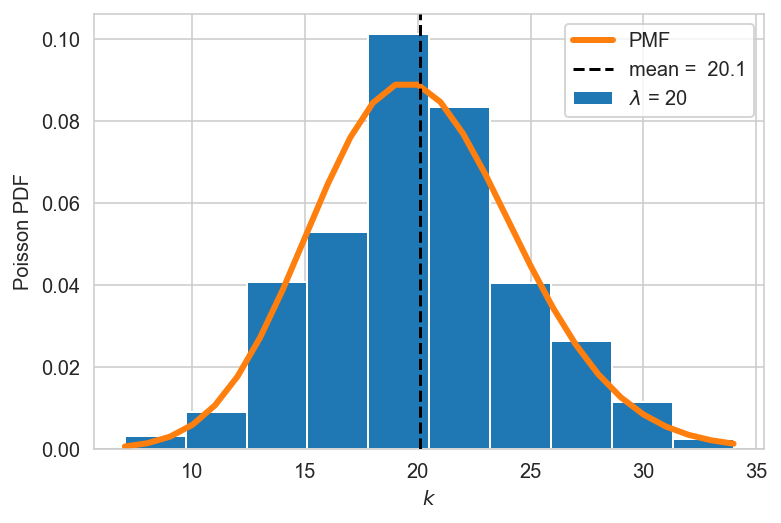

In [5]:
plt.hist(d, bins = 10, label = f'$\lambda$ = {lam}', density = True, zorder = 1)
plt.plot(d_sorted, pmf_sorted, linewidth=3, label='PMF', zorder = 2)
plt.axvline(np.average(d), color = 'k', linestyle='--', label = f'mean = {np.average(d): .1f}', zorder = 3)
plt.xlabel('$k$')
plt.ylabel('Poisson PDF')
plt.legend();

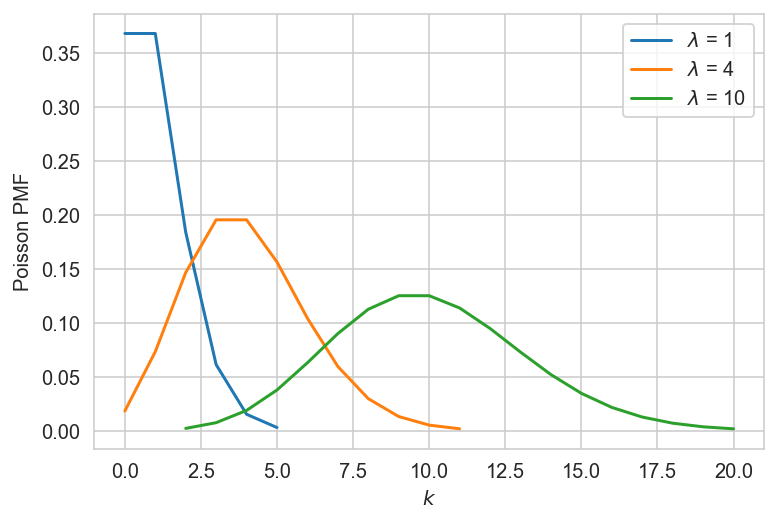

In [6]:
size = 1000
lam_list = [1, 4, 10]

for l in lam_list:
    d = np.random.poisson(lam = l, size = size)
    pmf = poisson.pmf(d, l)
    d_pmf = sorted([list(z) for z in zip(d, pmf)])
    d_sorted = [i[0] for i in d_pmf]
    pmf_sorted = [i[1] for i in d_pmf]
    plt.plot(d_sorted, pmf_sorted, label= f'$\lambda$ = {l}')
    plt.xlabel('$k$')
    plt.ylabel('Poisson PMF')
    plt.grid(True)
    plt.legend();

In [7]:
def poiss(lam = 1, k = 1000):
    d = np.random.poisson(lam = lam, size = k)
    p = poisson.pmf(d, lam)
    plt.figure(figsize=(8,5))
    plt.plot(d, p, 'o', ms=8,
             label = f'$\lambda = {lam: .1f}, k = {k: .1f}$')
    #plt.ylim(bottom = 0, top = 1)
    #plt.xlim(left = 0, right = lam)
    plt.grid(True)
    plt.xlabel('$k$')
    plt.ylabel('Poisson PMF')
    plt.legend()
    return (p)


In [8]:
interact_poiss = interactive(poiss, 
                            lam = (0, 20, 1), 
                            k = (0,1000,1), 
                            continuous_update = False)
display(interact_poiss)

interactive(children=(IntSlider(value=1, description='lam', max=20), IntSlider(value=1000, description='k', ma…